Plotting ChIP-seq data

In [1]:
import seaborn as sns
from omniplot import chipseq as ochip
import pandas as pd

Download data for demonstration. </br>
```bash

wget https://www.encodeproject.org/files/ENCFF406SHU/@@download/ENCFF406SHU.bigWig
mv ENCFF406SHU.bigWig KMT2A_ENCFF406SHU.bigWig
wget https://www.encodeproject.org/files/ENCFF709UTL/@@download/ENCFF709UTL.bigWig
mv ENCFF709UTL.bigWig KMT2B_ENCFF709UTL.bigWig
wget https://www.encodeproject.org/files/ENCFF397BTX/@@download/ENCFF397BTX.bigWig
mv ENCFF397BTX.bigWig HNF1A_rep1_ENCFF397BTX.bigWig
wget https://www.encodeproject.org/files/ENCFF502ACF/@@download/ENCFF502ACF.bigWig
mv ENCFF502ACF.bigWig HNF1A_rep2_ENCFF502ACF.bigWig
wget https://www.encodeproject.org/files/ENCFF960SAF/@@download/ENCFF960SAF.bed.gz
gunzip ENCFF960SAF.bed.gz
mv ENCFF960SAF.bed KMT2A_peaks_ENCFF960SAF.bed
bedtools sort -i KMT2A_peaks_ENCFF960SAF.bed > KMT2A_peaks_ENCFF960SAF_srt.bed  # alternatively, sort -k1,1 -k2,2n KMT2A_peaks_ENCFF960SAF.bed > KMT2A_peaks_ENCFF960SAF_srt.bed
wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_42/gencode.v42.annotation.gff3.gz
gunzip gencode.v42.annotation.gff3.gz
```

[[0.         0.90717417 0.38387275 0.13436021]
 [0.90717417 0.         0.38325126 0.15572685]
 [0.38387275 0.38325126 0.         0.8539526 ]
 [0.13436021 0.15572685 0.8539526  0.        ]]


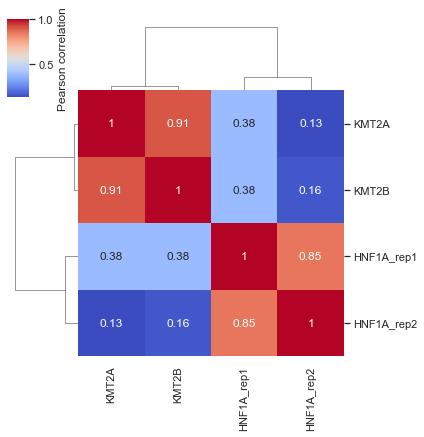

In [2]:
fs= {"KMT2A":"KMT2A_ENCFF406SHU.bigWig",
    "KMT2B":"KMT2B_ENCFF709UTL.bigWig",
    "HNF1A_rep1":"HNF1A_rep1_ENCFF397BTX.bigWig",
    "HNF1A_rep2":"HNF1A_rep2_ENCFF502ACF.bigWig",}
        
res=ochip.plot_bigwig_correlation(fs,step=1000)

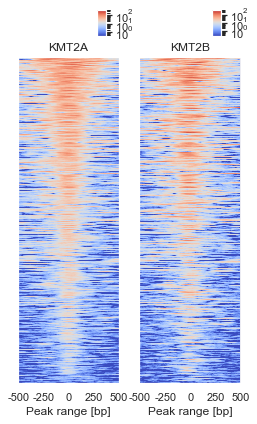

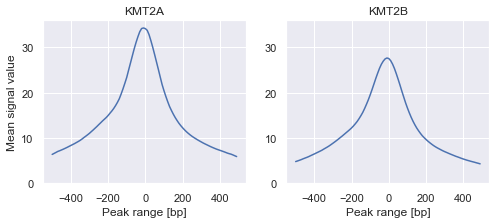

In [3]:
 peak="KMT2A_peaks_ENCFF960SAF_srt.bed"
files={"KMT2B":"KMT2B_ENCFF709UTL.bigWig",
                    "KMT2A":"KMT2A_ENCFF406SHU.bigWig"}
res=ochip.plot_average(files=files,
            bed=peak,
            order=["KMT2A",  "KMT2B"],
            )

Creating a region-of-interest bed file for drawing signals
```bash
echo -e chr5"\t"112827904"\t"113040977"\n"chr8"\t"66403269"\t"66439215 > roi.bed
```

0
112827904 113040977 113040974 213073 10
66403269 66439215 66439209 35946 10
0
112827904 113040977 113040974 213073 10
66403269 66439215 66439209 35946 10


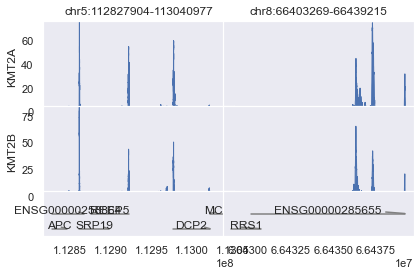

In [4]:
fs= {"KMT2A":"KMT2A_ENCFF406SHU.bigWig",
     "KMT2B":"KMT2B_ENCFF709UTL.bigWig"}
bed="roi.bed"
gff="gencode.v42.annotation.gff3"

re=ochip.plot_bigwig(fs,bed,gff, step=10)

```bash
python3 /<pathto>/omniplot/omniplot/scripts/gff2tss.py gencode.v40.annotation.gff3
```

85505045 85560966 85560945 55921 100
50356477 50434483 50434477 78006 100
32812996 32857562 32857496 44566 100
88477857 88536053 88535957 58196 100
87832477 87868639 87868577 36162 100


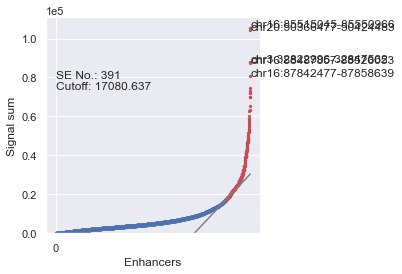

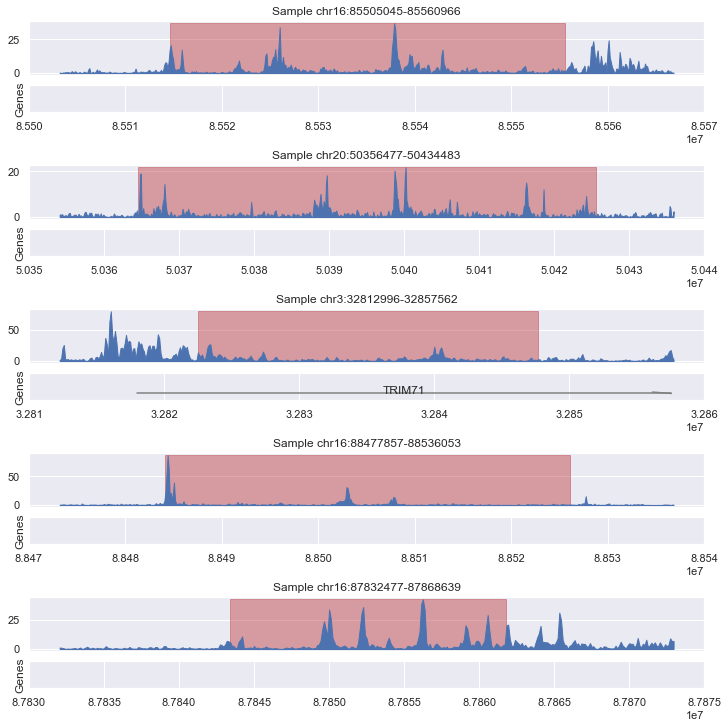

In [5]:
gff="gencode.v42.annotation.gff3"
f="KMT2A_ENCFF406SHU.bigWig"
peak="KMT2A_peaks_ENCFF960SAF_srt.bed"
tss="gencode.v42.annotation_tss.bed"
ochip.call_superenhancer(bigwig=f, peakfile=peak,tss=tss,plot_signals=True , gff=gff)